In [3]:
import os
os.chdir('/Users/williamkapner/Documents/GSB_544')

In [4]:
import pandas as pd

avocado = pd.read_csv("Data/avocado-updated-2020.csv")
avocado

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


## Part 1
This data is about avocados. For a particular date, it tells us the number of avocados of each type that are sold including 4046 and 4225. It also tells us how many of each type of bag is sold, as well as the type of avocado, the year, and the geography.

In [16]:
## Part 2
avocado.rename(columns = {'4046':'small_hass','4225':'large_hass','4770':'xl_hass'},inplace=True)

avocado['geography'].unique()

avocado['region'] = avocado['geography'].map({
    'Albany': 'Northeast',
    'Baltimore/Washington': 'Northeast',
    'Boston': 'Northeast',
    'Buffalo/Rochester': 'Northeast',
    'Hartford/Springfield': 'Northeast',
    'New York': 'Northeast',
    'Northeast': 'Northeast',
    'Northern New England': 'Northeast',
    'Philadelphia': 'Northeast',
    'Pittsburgh': 'Northeast',
    'Syracuse': 'Northeast',
    'Atlanta': 'South',
    'Charlotte': 'South',
    'Dallas/Ft. Worth': 'South',
    'Houston': 'South',
    'Jacksonville': 'South',
    'Miami/Ft. Lauderdale': 'South',
    'Midsouth': 'South',
    'Nashville': 'South',
    'New Orleans/Mobile': 'South',
    'Orlando': 'South',
    'Raleigh/Greensboro': 'South',
    'Richmond/Norfolk': 'South',
    'Roanoke': 'South',
    'South Carolina': 'South',
    'Southeast': 'South',
    'Tampa': 'South',
    'South Central': 'South',
    'Chicago': 'Midwest',
    'Cincinnati/Dayton': 'Midwest',
    'Columbus': 'Midwest',
    'Detroit': 'Midwest',
    'Grand Rapids': 'Midwest',
    'Great Lakes': 'Midwest',
    'Harrisburg/Scranton': 'Midwest',
    'Indianapolis': 'Midwest',
    'Louisville': 'Midwest',
    'Plains': 'Midwest',
    'St. Louis': 'Midwest',
    'Boise': 'West',
    'Denver': 'West',
    'Las Vegas': 'West',
    'Los Angeles': 'West',
    'Sacramento': 'West',
    'San Diego': 'West',
    'San Francisco': 'West',
    'Seattle': 'West',
    'Spokane': 'West',
    'Phoenix/Tucson': 'West',
    'Portland': 'West',
    'West': 'West',
    'West Tex/New Mexico': 'West',
    'California': 'West',
    'Total U.S.': 'Other'
}).fillna('Other')

avocado


,date,average_price,total_volume,small_hass,large_hass,xl_hass,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,Northeast
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,Northeast
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,South
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,South
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.,Other
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,West


In [59]:
## 3 
avocadoOrganic = avocado[avocado['type']=="organic"]
avocadoOrganic.groupby('region').sum('small_hass')


,average_price,total_volume,small_hass,large_hass,xl_hass,total_bags,small_bags,large_bags,xlarge_bags,year,day,month
region,,,,,,,,,,,,
Midwest,5139.62,1.125427e+08,4792092.29,30380121.04,231774.10,7.565583e+07,5.034016e+07,25307823.70,7840.61,6790773,52272,21450
Northeast,5742.54,1.279073e+08,11298313.99,23886145.13,450818.30,9.227201e+07,8.138411e+07,10886919.01,980.44,6790773,52272,21450
Other,476.86,3.933987e+08,43092270.59,82534827.87,1456922.63,2.653591e+08,1.934014e+08,71772306.08,185427.26,617343,4752,1950
South,7929.61,1.681952e+08,17666668.34,24780011.82,1293366.28,1.244455e+08,9.653027e+07,27681427.15,233775.95,10494831,80784,33150
West,7395.90,2.496592e+08,38326691.23,61892682.37,443137.64,1.489967e+08,9.188238e+07,57080853.34,33414.55,8636753,66479,27276


In [ ]:
The West region sold the most organic small hass avocados.

In [29]:
## 4
avocado['date'] = pd.DatetimeIndex(avocado['date'])
avocado['day'] = avocado['date'].dt.day
avocado['month'] = avocado['date'].dt.month
avocado['year'] = avocado['date'].dt.year
avocado.groupby('month').mean('total_volume')

,average_price,total_volume,small_hass,large_hass,xl_hass,total_bags,small_bags,large_bags,xlarge_bags,year,day
month,,,,,,,,,,,
1,1.287596,9.853122e+05,308693.058179,312853.505905,22480.002184,341278.942956,234641.787819,101886.862623,4750.292514,2017.444444,15.518519
2,1.248885,1.095374e+06,356108.726586,329465.377199,27114.248681,382679.807581,257941.593086,118359.108364,6379.106130,2017.500000,14.166667
3,1.316207,9.957150e+05,319500.287778,280341.474979,22722.835312,373146.523045,257800.970532,109003.142239,6342.410274,2017.555556,15.592593
4,1.374765,1.016582e+06,328330.040096,288992.924466,23387.748900,375867.780659,263520.526179,104816.774014,7530.478686,2017.500000,15.500000
5,1.362226,1.123632e+06,365450.569945,322915.208484,24807.403755,410266.976481,282949.842977,118736.179386,8580.955833,2017.444444,16.407407
6,1.403636,1.051247e+06,333553.366679,292529.670089,25541.020170,398948.428058,274579.395827,112721.230545,11647.804281,2017.560415,15.755745
7,1.457877,9.832681e+05,299886.604012,286913.961481,24286.230278,372170.486228,259734.473515,101153.085415,11282.926612,2017.444444,16.074074
8,1.470107,9.499249e+05,293459.626250,268170.179452,20111.723497,368181.512073,254275.793565,104320.211189,9585.506962,2017.500000,16.000000
9,1.485673,9.064773e+05,272419.824619,258556.891759,17596.858949,357901.622625,246234.611004,104358.588974,7308.422646,2017.576923,15.346154


May has the highest average volume of avocado sales.

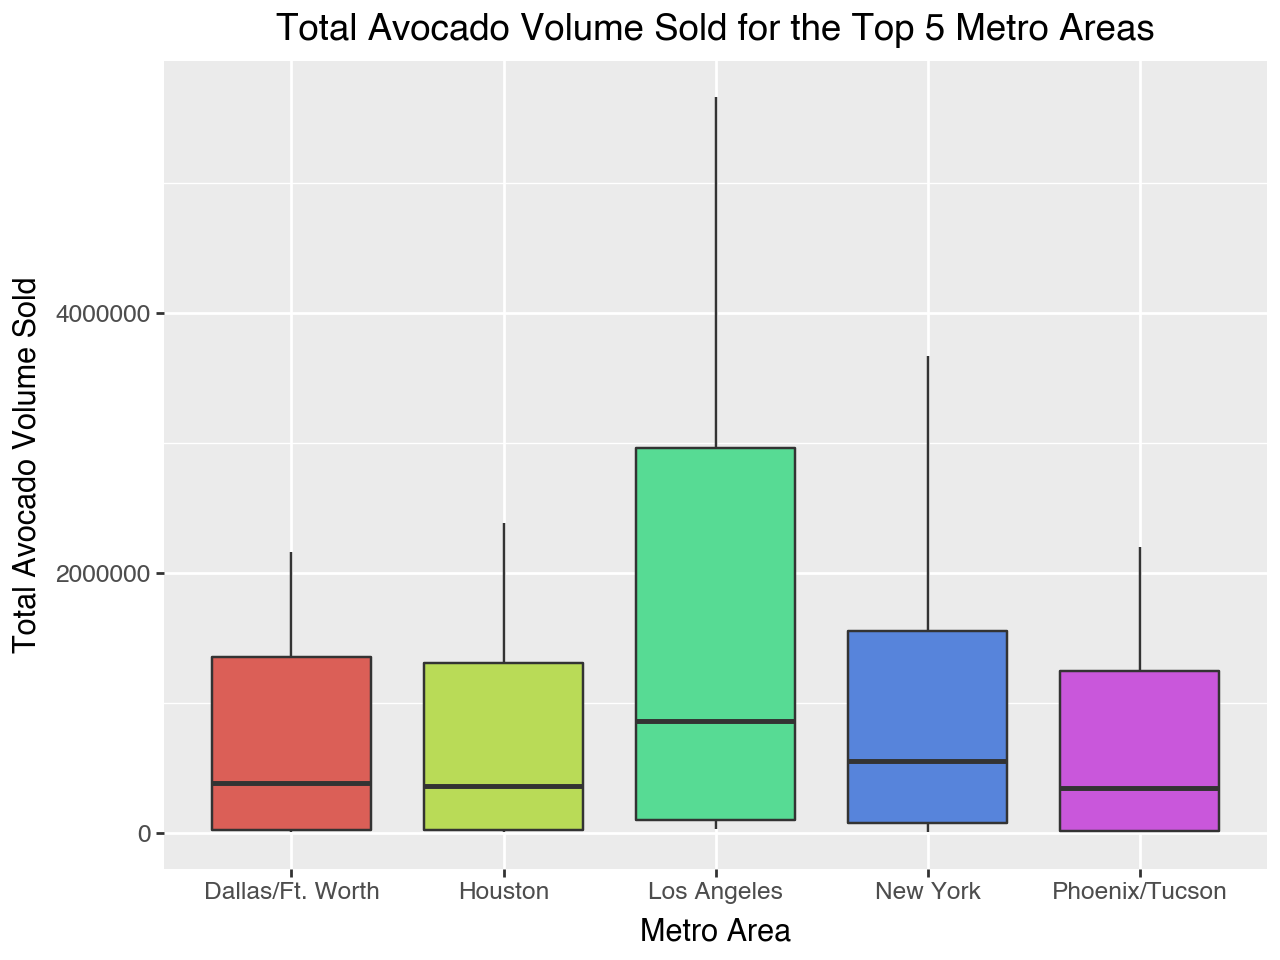

In [58]:
## 5
import numpy as np
import plotnine as pt

#Filetering out regions
region = ["Great Lakes", "Midsouth", "Northeast", "Plains", "South Central", "West", "California", "Southeast", "Total U.S."]
avocado['geotype'] = np.where(avocado['geography'].isin(region),"Region","Metro")

#Finding the top 5 metro areas for total_volume
avocadometros = avocado[avocado['geotype']=='Metro']
top5 = avocadometros.groupby('geography').mean('total_volume').sort_values(by = 'total_volume',ascending=False).head(5)

#Filtering for only the top 5 metro areas
metros = ["Los Angeles", "New York","Dallas/Ft. Worth", "Houston","Phoenix/Tucson"]
avocadometrostop5 = avocadometros[avocadometros['geography'].isin(metros)]


#Graphing
(pt.ggplot(avocadometrostop5, pt.aes(x = 'geography',y='total_volume',fill='geography'))
+pt.geom_boxplot()
+pt.guides(fill=False)
+pt.labs(x = "Metro Area", y = "Total Avocado Volume Sold", title='Total Avocado Volume Sold for the Top 5 Metro Areas')
)

In [61]:
## 6
cali_regions = ["Los Angeles",'San Diego','Sacramento',"San Francisco"]
cali_avocado = avocado[avocado['geography'].isin(cali_regions)]
cali_avocado

,date,average_price,total_volume,small_hass,large_hass,xl_hass,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region,day,month,geotype
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,West,4,1,Metro
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,West,4,1,Metro
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,West,4,1,Metro
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,West,4,1,Metro
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,West,4,1,Metro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33018,2020-11-29,1.43,23531.38,3303.69,2057.03,0.00,18170.66,18144.54,26.12,0.00,organic,2020,Sacramento,West,29,11,Metro
33019,2020-11-29,1.12,469356.72,104509.99,19988.45,7210.47,337647.81,189341.36,127701.64,20604.81,conventional,2020,San Diego,West,29,11,Metro
33020,2020-11-29,1.95,25799.95,894.63,838.11,0.00,24067.21,9691.46,14375.75,0.00,organic,2020,San Diego,West,29,11,Metro
33021,2020-11-29,1.50,644141.37,128555.43,136718.24,5597.21,373270.49,159276.65,207760.32,6233.52,conventional,2020,San Francisco,West,29,11,Metro


In [90]:
## 7
cali_avocado_average = cali_avocado.groupby(['geography','type']).mean(numeric_only=True).reset_index()
cali_avocado_average_organic = cali_avocado_average[cali_avocado_average['type']=='organic']
cali_avocado_average_conventional = cali_avocado_average[cali_avocado_average['type']=='conventional']
cali_avo = cali_avocado_average_organic.merge(cali_avocado_average_conventional, on = 'geography', how = 'inner')
cali_avo['diff'] = cali_avo['average_price_x']-cali_avo['average_price_y']
cali_avo.loc[:,['geography','diff']]



# cali_avo = cali_avocado_average_organic.subtract(cali_avocado_average_conventional, fill_value=0)

# cali_avo

,geography,diff
0,Los Angeles,0.527778
1,Sacramento,0.578497
2,San Diego,0.684510
3,San Francisco,0.718954


In [92]:
#Here, we can see summary statistics with X representing organic avocados and y representing conventional
cali_avo

,geography,type_x,average_price_x,total_volume_x,small_hass_x,large_hass_x,xl_hass_x,total_bags_x,small_bags_x,large_bags_x,xlarge_bags_x,year_x,day_x,month_x,type_y,average_price_y,total_volume_y,small_hass_y,large_hass_y,xl_hass_y,total_bags_y,small_bags_y,large_bags_y,xlarge_bags_y,year_y,day_y,month_y,diff
0,Los Angeles,organic,1.574902,100245.139771,14442.064641,20804.220654,6.035294,64992.825719,50845.815686,14143.443170,3.550523,2017.460784,15.529412,6.372549,conventional,1.047124,3.034887e+06,1.172952e+06,443842.308562,97073.643529,1.321019e+06,1.059468e+06,178961.022941,82590.235948,2017.460784,15.529412,6.372549,0.527778
1,Sacramento,organic,1.873856,11410.996569,2808.892647,4282.693203,0.772680,4318.654379,4281.482908,37.168203,0.000000,2017.460784,15.529412,6.372549,conventional,1.295359,4.764038e+05,1.412831e+05,243005.070163,6333.279673,8.578228e+04,6.663486e+04,15619.329314,3528.093333,2017.460784,15.529412,6.372549,0.578497
2,San Diego,organic,1.798366,19314.132484,2573.068268,7273.784575,1.323595,9465.949510,5713.699085,3752.263497,0.000000,2017.460784,15.529412,6.372549,conventional,1.113856,5.485435e+05,1.637928e+05,140106.101438,17963.543497,2.266811e+05,1.625058e+05,58257.213333,5918.116667,2017.460784,15.529412,6.372549,0.684510
3,San Francisco,organic,2.119444,34357.549281,8303.040784,11350.098072,2.159346,14702.254346,14544.530425,157.238497,0.482157,2017.460784,15.529412,6.372549,conventional,1.400490,8.617761e+05,2.158398e+05,449377.420359,14931.603235,1.816273e+05,1.148852e+05,58895.667778,7846.401078,2017.460784,15.529412,6.372549,0.718954


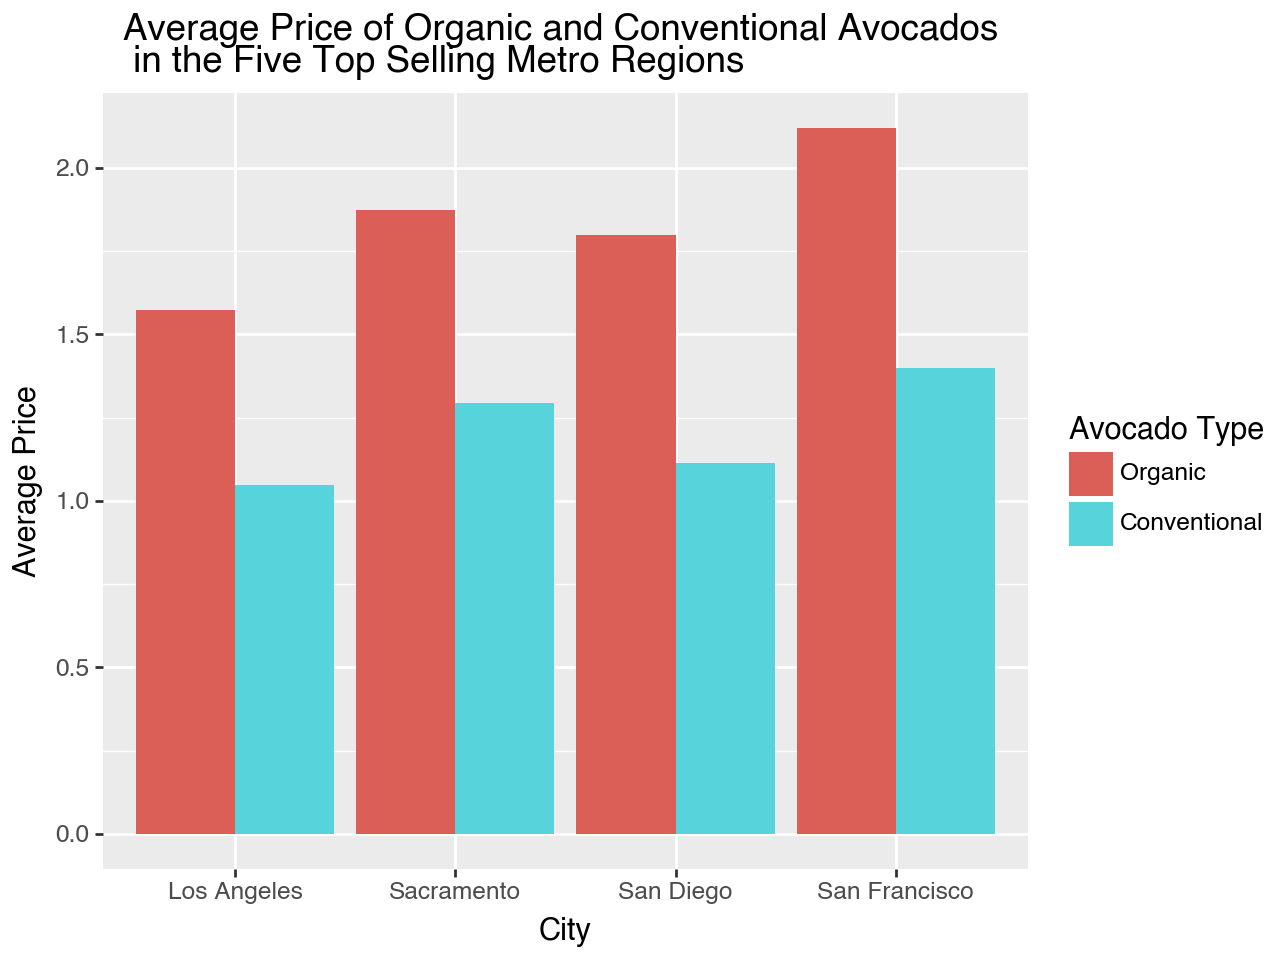

In [101]:
#Visualization
import plotnine as pt

#Creating a long data frame
avo_melted = cali_avo.melt(id_vars='geography', value_vars=['average_price_x', 'average_price_y'], var_name='Type', value_name='Avg_price')


(pt.ggplot(avo_melted, pt.aes(x = 'geography',y='Avg_price',fill = 'Type'))
+pt.geom_col(stat = 'identity',position = 'dodge')
+pt.labs(title='Average Price of Organic and Conventional Avocados \n in Four California Metro Regions',
x = 'City', y = 'Average Price', fill = 'Avocado Type')
+pt.scale_fill_discrete(labels = ['Organic','Conventional'])
)

The largest difference occurred in San Francisco.

In [132]:
## 8 
#Finding Organic S/M/XL Percentages of total sales
cali_avocado_average['small_hass_pct'] = cali_avocado_average['small_hass']/(cali_avocado_average['small_hass']+cali_avocado_average['large_hass']+cali_avocado_average['xl_hass'])
cali_avocado_average['large_hass_pct'] = cali_avocado_average['large_hass']/(cali_avocado_average['small_hass']+cali_avocado_average['large_hass']+cali_avocado_average['xl_hass'])
cali_avocado_average['xl_hass_pct'] = cali_avocado_average['xl_hass']/(cali_avocado_average['small_hass']+cali_avocado_average['large_hass']+cali_avocado_average['xl_hass'])

# cali_avocado_average['small_pct'] = cali_avocado_average['small_hass']/cali_avocado_average['total_volume']
# cali_avocado_average['large_pct'] = cali_avocado_average['large_hass']/cali_avocado_average['total_volume']
# cali_avocado_average['xl_pct'] = cali_avocado_average['xl_hass']/cali_avocado_average['total_volume']

# cali_avo['small_hass_y_pct'] = cali_avo['small_hass_y']/cali_avo['total_volume_y']
# cali_avo['large_hass_y_pct'] = cali_avo['large_hass_y']/cali_avo['total_volume_y']
# cali_avo['xl_hass_y_pct'] = cali_avo['xl_hass_y']/cali_avo['total_volume_y']

cali_avocado_average

,geography,type,average_price,total_volume,small_hass,large_hass,xl_hass,total_bags,small_bags,large_bags,xlarge_bags,year,day,month,small_hass_pct,large_hass_pct,xl_hass_pct
0,Los Angeles,conventional,1.047124,3.034887e+06,1.172952e+06,443842.308562,97073.643529,1.321019e+06,1.059468e+06,178961.022941,82590.235948,2017.460784,15.529412,6.372549,0.684389,0.258971,0.056640
1,Los Angeles,organic,1.574902,1.002451e+05,1.444206e+04,20804.220654,6.035294,6.499283e+04,5.084582e+04,14143.443170,3.550523,2017.460784,15.529412,6.372549,0.409677,0.590152,0.000171
2,Sacramento,conventional,1.295359,4.764038e+05,1.412831e+05,243005.070163,6333.279673,8.578228e+04,6.663486e+04,15619.329314,3528.093333,2017.460784,15.529412,6.372549,0.361688,0.622099,0.016213
3,Sacramento,organic,1.873856,1.141100e+04,2.808893e+03,4282.693203,0.772680,4.318654e+03,4.281483e+03,37.168203,0.000000,2017.460784,15.529412,6.372549,0.396045,0.603846,0.000109
4,San Diego,conventional,1.113856,5.485435e+05,1.637928e+05,140106.101438,17963.543497,2.266811e+05,1.625058e+05,58257.213333,5918.116667,2017.460784,15.529412,6.372549,0.508891,0.435298,0.055811
5,San Diego,organic,1.798366,1.931413e+04,2.573068e+03,7273.784575,1.323595,9.465950e+03,5.713699e+03,3752.263497,0.000000,2017.460784,15.529412,6.372549,0.261274,0.738592,0.000134
6,San Francisco,conventional,1.400490,8.617761e+05,2.158398e+05,449377.420359,14931.603235,1.816273e+05,1.148852e+05,58895.667778,7846.401078,2017.460784,15.529412,6.372549,0.317342,0.660705,0.021953
7,San Francisco,organic,2.119444,3.435755e+04,8.303041e+03,11350.098072,2.159346,1.470225e+04,1.454453e+04,157.238497,0.482157,2017.460784,15.529412,6.372549,0.422433,0.577457,0.000110


In [133]:
#Putting the data into long format
cali_avo_melted = cali_avocado_average.melt(id_vars=['geography','type'], 
value_vars=['small_hass_pct', 'large_hass_pct',"xl_hass_pct"], 
var_name='Size', value_name='Hass Pct')
cali_avo_melted

,geography,type,Size,Hass Pct
0,Los Angeles,conventional,small_hass_pct,0.684389
1,Los Angeles,organic,small_hass_pct,0.409677
2,Sacramento,conventional,small_hass_pct,0.361688
3,Sacramento,organic,small_hass_pct,0.396045
4,San Diego,conventional,small_hass_pct,0.508891
5,San Diego,organic,small_hass_pct,0.261274
6,San Francisco,conventional,small_hass_pct,0.317342
7,San Francisco,organic,small_hass_pct,0.422433
8,Los Angeles,conventional,large_hass_pct,0.258971
9,Los Angeles,organic,large_hass_pct,0.590152


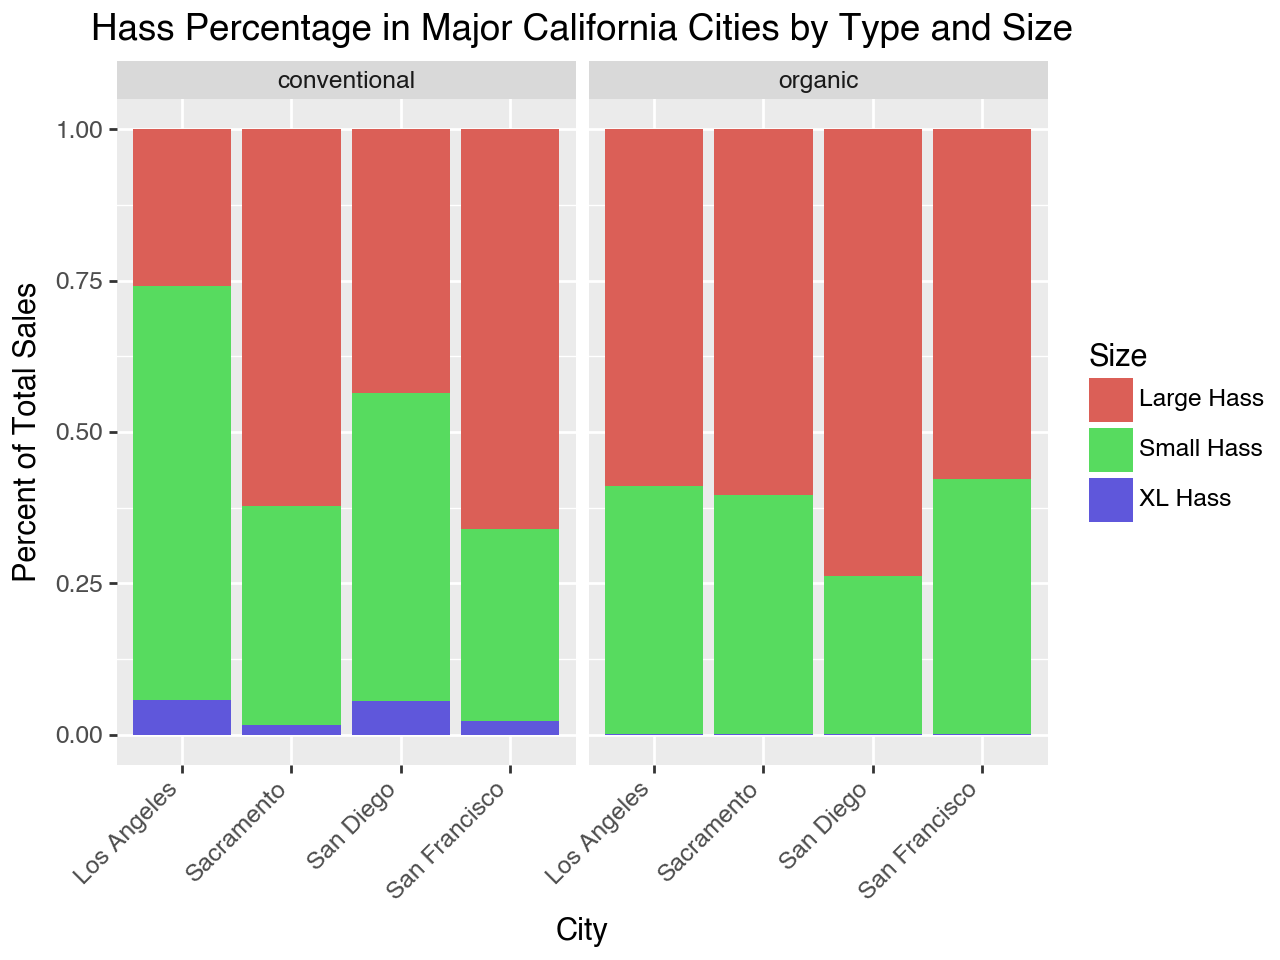

In [137]:
# Making the plot
# from plotnine import ggplot, aes, labs, facet_wrap, geom_bar

(ggplot(cali_avo_melted,aes(x='geography',y='Hass Pct',fill = 'Size'))
+geom_bar(stat = 'identity')
+facet_wrap('type')+
labs(title = 'Hass Percentage in Major California Cities by Type and Size',
x = 'City', y = 'Proportion of Total Sales')
+ pt.scale_fill_discrete(labels = ['Large Hass', 'Small Hass', 'XL Hass'])
+ pt.theme(axis_text_x=pt.element_text(angle=45, hjust=1))
)


In [154]:
## Outside Data
housing_data = {
"geography": ["Los Angeles", "San Diego", "Sacramento","San Francisco"],
'avg_house_price': [1000765,1128456,860318,1114409]
}
housing = pd.DataFrame(housing_data)
housing
cali_avocado

#merging data sets
housing_merge = cali_avocado.groupby('geography').mean(numeric_only = True).merge(housing,on= 'geography',how='inner')
housing_merge[money_spent] = average_price


,geography,average_price,total_volume,small_hass,large_hass,xl_hass,total_bags,small_bags,large_bags,xlarge_bags,year,day,month,avg_house_price
0,Los Angeles,1.311013,1.567566e+06,593697.201307,232323.264608,48539.839412,693005.853203,555156.720376,96552.233056,41296.893235,2017.460784,15.529412,6.372549,1000765
1,Sacramento,1.584608,2.439074e+05,72046.003905,123643.881683,3167.026176,45050.468513,35458.173088,7828.248758,1764.046667,2017.460784,15.529412,6.372549,860318
2,San Diego,1.456111,2.839288e+05,83182.928873,73689.943007,8982.433546,118073.527484,84109.738905,31004.738415,2959.058333,2017.460784,15.529412,6.372549,1128456
3,San Francisco,1.759967,4.480668e+05,112071.397958,230363.759216,7466.881291,98164.770931,64714.872908,29526.453137,3923.441618,2017.460784,15.529412,6.372549,1114409


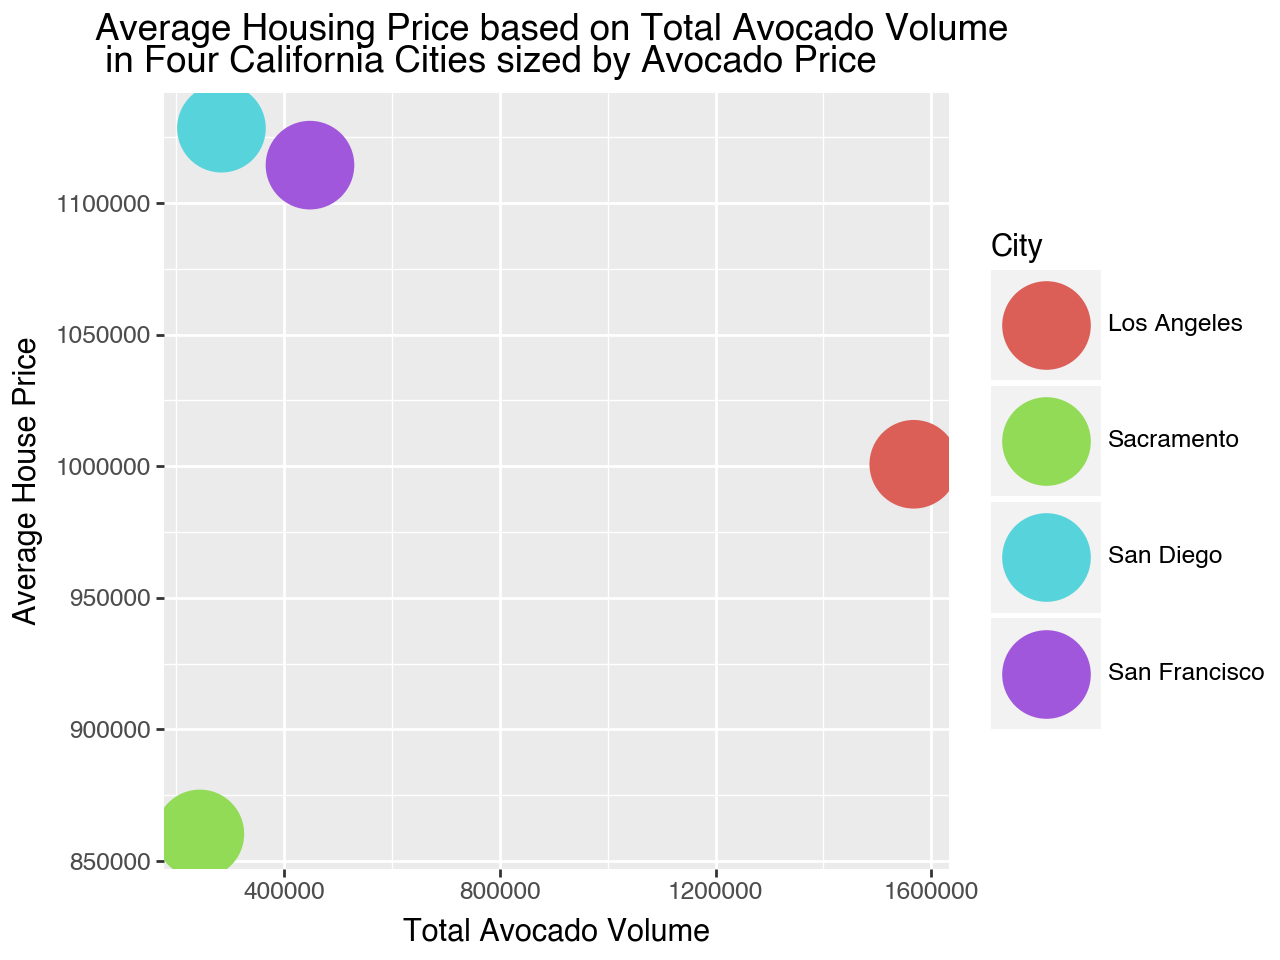

In [161]:
#graph

(ggplot(housing_merge, aes(x='total_volume',y='avg_house_price',color = 'geography',size = 'average_price'))
+pt.geom_point(size=17)
+labs(title = "Average Housing Price based on Total Avocado Volume \n in Four California Cities sized by Avocado Price",
x='Total Avocado Volume', y='Average House Price', color = 'City')
)

From the data frame above, we can see that the prices of avocados range from $1-2, while the price for a house sits at around $1 million for all of the cities. This means someone would have to refrain from buying more than 500,000 avocados to afford a house. This is an absurd amount of avocado consumption for someone to have in their entire life, so avocados are clearly not the problem. Additionally, the graph above concerning total volume of avocados and the average house price shows no clear relationship between the amount of avocados being sold and the average house price. Perhaps the housing prices are a larger driver of unaffordable housing more than young people's "irresponsible" spending.